In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pyclesperanto as cle
from pyclesperanto.__experimental__ import sato as cle_sato
from pyclesperanto.__experimental__ import hessian_gaussian_eigenvalues
from pyclesperanto.__experimental__ import gaussian_derivative

from scipy.ndimage import gaussian_filter

from skimage.filters import sato
from skimage.feature.corner import hessian_matrix, hessian_matrix_eigvals
from skimage import data

cle.select_device(1,"gpu")

(OpenCL) NVIDIA GeForce RTX 4090 (OpenCL 3.0 CUDA)
	Vendor:                      NVIDIA Corporation
	Driver Version:              535.247.01
	Device Type:                 GPU
	Compute Units:               128
	Global Memory Size:          24217 MB
	Local Memory Size:           0 MB
	Maximum Buffer Size:         6054 MB
	Max Clock Frequency:         2625 MHz
	Image Support:               Yes

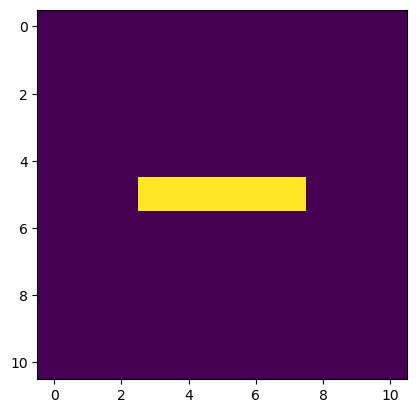

In [5]:
sigma = 1
arr = np.zeros((11,11)).astype(np.float32)
arr[5,3:8]= 1
plt.imshow(arr)

### scipy

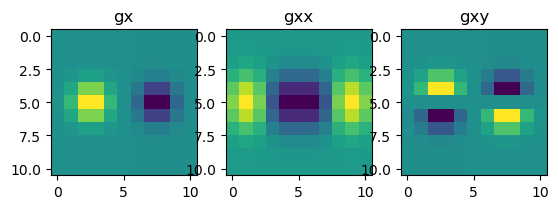

In [8]:
gx = gaussian_filter(arr, sigma, order=[0,1], truncate=8, mode="constant", cval=0)
gxx = gaussian_filter(gx, sigma, order=[0,1], truncate=8, mode="constant", cval=0)
# gxy = gaussian_filter(gx, sigma, order=[1,0], truncate=8, mode="constant", cval=0)
gxy = gaussian_filter(arr, sigma, order=[1,1], truncate=8, mode="constant", cval=0)

fig, axs = plt.subplots(1,3)
axs[0].imshow(gx)
axs[0].set_title("gx")
axs[1].imshow(gxx)
axs[1].set_title("gxx")
axs[2].imshow(gxy)
axs[2].set_title("gxy")
plt.show()

### pyclesperanto

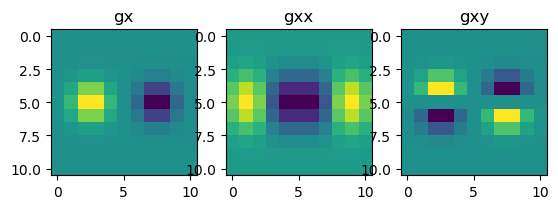

In [9]:
g_x = gaussian_derivative(arr, sigma_x=sigma, sigma_y=sigma, order_x=1, order_y=0)
g_xx = gaussian_derivative(g_x, sigma_x=sigma, sigma_y=sigma, order_x=1, order_y=0)
# g_xy = gaussian_derivative(g_x, sigma_x=sigma, sigma_y=sigma, order_x=0, order_y=1)
g_xy = gaussian_derivative(arr, sigma_x=sigma, sigma_y=sigma, order_x=1, order_y=1)


fig, axs = plt.subplots(1,3)
axs[0].imshow(g_x)
axs[0].set_title("gx")
axs[1].imshow(g_xx)
axs[1].set_title("gxx")
axs[2].imshow(g_xy)
axs[2].set_title("gxy")
plt.show()